# **PFE: Solution of differential equations PDEs**

### **PART 1 : Solving partial differential equations using deep learning 'Neural networks' with SciANN library**

#### **The first type of equations is Burgers equation**

   * **Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn 
from sciann.utils import diff, sin, sign

---------------------- SCIANN 0.6.5.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 



* **Step 1: Setting up the neural network**

In [2]:
# generate the inputs variables
x = sn.Variable('x')
t = sn.Variable('t')
# generate the outputs variables # Field is a layer to define outputs of each Functional. It is very much similar to Keras Dense layer.
u = sn.Field('u', units=1) 
# Functional Multi-Layer Perceptron
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

* **Step 2: Setting up the optimization problem**

In [3]:
# generate the function  
L1 = diff(u, t) + u*diff(u,x) - (0.01/np.pi)*diff(u, x, order=2)

In [4]:
# geneate the boundary conditions
T_min = 0.001
C1 = (1-sign(t - T_min)) * (u + sin(np.pi*x)) # u(t=0, x) = -sin(pi*x) 
C2 = (1-sign(x - (-1+T_min))) * (u)           # u(t, x=1) = 0
C3 = (1+sign(x - ( 1-T_min))) * (u)           # u(t, x=-1) = 0
# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.

In [5]:
# generate the model
model = sn.SciModel([x, t], [L1, C1, C2, C3], plot_to_file='BE-Model.png')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat (Concatenate)            (None, 2)            0           t[0][0]                          
                                                                 x[0][0]                          
__________________________________________________________________________________________________
D20b (Dense)                    (None, 20)           60          concat[0][0]                 

* **Sampling grid** 

 ***Training***

In [6]:
x_train, t_train = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)
print(x_train.shape)
print(t_train.shape)

(100, 100)
(100, 100)


In [7]:
# training the data # calculate the loss function
training_history = model.train([x_train, t_train], 4*['zero'], learning_rate=0.002, epochs=100, verbose=0)


Total samples: 10000 
Batch size: 64 
Total batches: 157 


Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


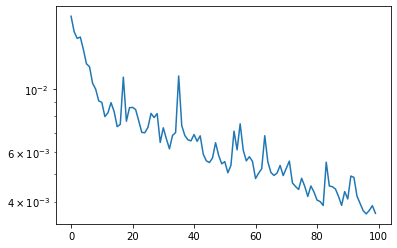

In [8]:
plt.semilogy(training_history.history['loss'])
plt.savefig('burgerloss.png', format='png')

***Testing***

In [9]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
print(x_test.shape)
print(t_test.shape)

(200, 200)
(200, 200)


Evaluate the test data

In [10]:
u_pred = u.eval(model, [x_test, t_test])
u_pred.shape

(200, 200)

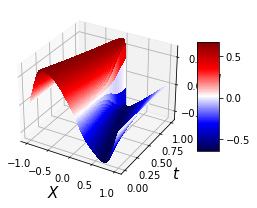

In [11]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_test, t_test, u_pred, rstride=1, cstride=1, cmap=cm.seismic, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$t$', fontsize=15)
ax.set_zlabel('$u$', fontsize=15)
plt.show()

C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_7948/4217290362.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_test, t_test, u_pred, cmap='seismic')


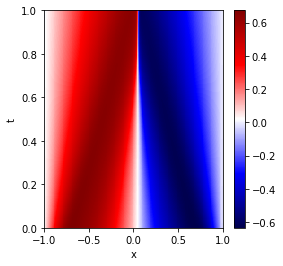

In [12]:
fig = plt.figure(figsize=(4, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.savefig("uBurger2D.png", format='png')